 # **Problem Statement**

The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.
The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R and achieve the following goals: Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized Present the financial benefit of this project to the marketing team

In [2]:
import  pandas  as  pd
import  numpy as  np                   # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
import seaborn as sns

In [3]:
data = pd.read_csv(r'bank-full.csv',sep=';')
y = data['y']
y = y.replace(['yes','no'],(1,0))

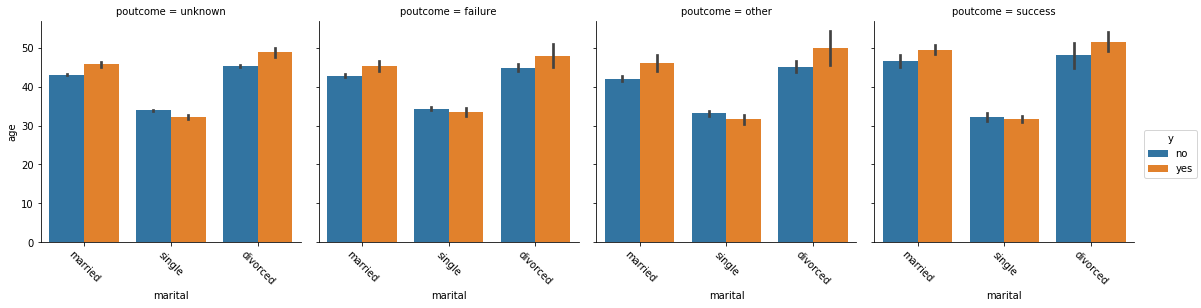

In [4]:
# Factor Plot
g = sns.factorplot(x='marital', 
                   y='age', 
                   data=data, 
                   hue='y',  # Color by stage
                   col='poutcome',
                  kind = 'bar')  # Separate by stage
                   
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

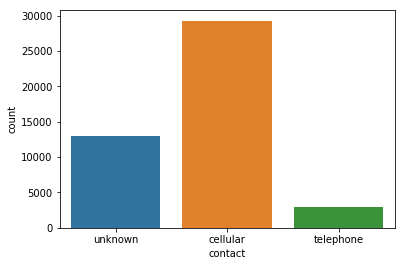

In [5]:
sns.countplot(x='contact', data=data)

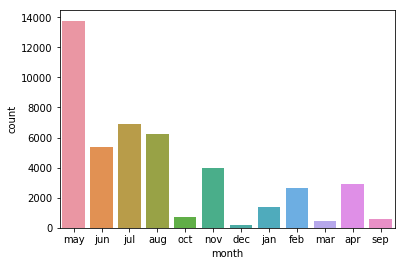

In [6]:
sns.countplot(x='month', data=data)

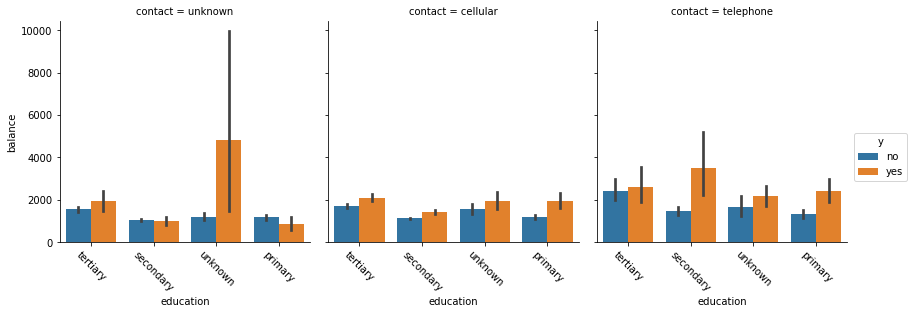

In [7]:
# Factor Plot
g = sns.factorplot(x='education', 
                   y='balance', 
                   data=data, 
                   hue='y',  # Color by stage
                   col='contact',
                  kind = 'bar')  # Separate by stage
                   
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

In [8]:
from sklearn import preprocessing
def encode_features(df_train):
    features = ['job','marital','default','education','housing','loan','contact','month','poutcome']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train

In [9]:
data = encode_features(data)

In [10]:
X = data.drop(['y'], axis = 1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

 ## **Random Forest**

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
ranfor = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=13,criterion='gini')

In [14]:
ranfor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [15]:
y_pred = ranfor.predict(X_test)


In [16]:
from  sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_pred,y_test)

0.9077739688156585

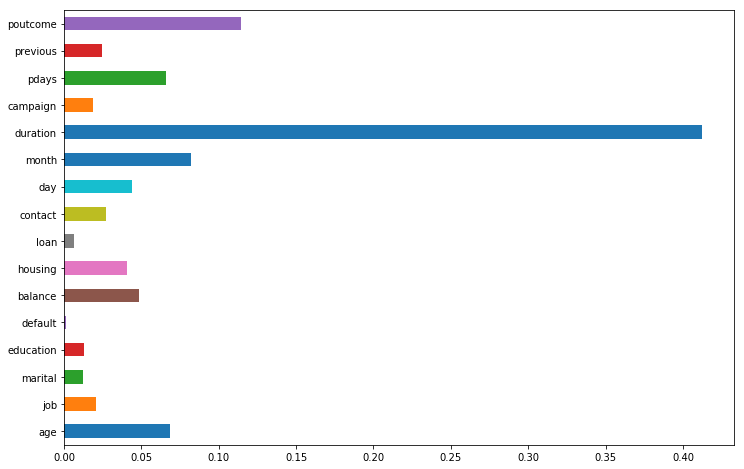

In [18]:
importances=pd.Series(ranfor.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

## real data prediction

 Testing the model on test set

In [20]:
bank_random = pd.read_csv(r'bank.csv',sep=';')

In [21]:
y_random = bank_random['y']

In [22]:
y_random = y_random.replace(['yes','no'],(1,0))

In [23]:
X_random = bank_random.drop(['y'], axis = 1)


In [24]:
X_random = encode_features(X_random)